## 신뢰구간

- 표본에서 얻은 정보를 기반으로 `모집단의 특성을 추정`하는 방법 중 하나 <br>

- `모수(모집단의 특성)에 대한 추정값의 범위`를 제공하여 추정의 불확실성을 나타냄<br>

- 신뢰구간은 주어진 신뢰수준(일반적으로 95% 또는 99% 등)에 따라 `모수가 존재할 것으로 예상되는 범위`를 나타낸다. 예를 들어, 95% 신뢰구간은 모수가 95% 확률로 해당 구간에 속할 것으로 추정함 <br>

- 신뢰구간은 일반적으로 표본 크기, 추정 방법, 데이터의 변동성 등과 같은 요소에 따라 달라질 수 있으며 정확한 신뢰구간을 구하기 위해서는 통계학적인 가정과 계산 방법을 사용해야 한다. <br>

    > 결국은 그나마 내가 확실히 말할 수 있는 정도 라는 의미

## 파이썬으로 신뢰구간 구하기

- `scipy.stats` 패키지의 `t` 객체가 포함하는 `interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차)` 메서드를 사용한다.

|파라미터|설명|
|-------|----|
|신뢰도 | 95%, 90% 등을 0~1 범위 안에서 설정|
|자유도 | 통계모델의 매개변수나 관측지들이 얼마나 자유롭게 변할 수 있는지를 나타내는 값. 일반적으로 *전체데이터수-1*|
|샘플평균|데이터들의 평균값|
|샘플표준오차|데이터들의 표준오차 -> 표준편차 / (샘플크기**0.5)

### #01. 작업준비

#### 패키지 참조

In [1]:
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
import sys

#### 데이터 가져오기

In [3]:
df = read_excel("https://data.hossam.kr/E02/insur.xlsx")
df

,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150
5,2,2,1,48,2.5,200
6,3,3,2,50,9.0,90
7,3,3,1,53,7.5,180
8,2,2,1,49,5.5,250
9,3,4,1,55,25.0,300


### #02. 신뢰구간 구하기

#### 신뢰수준

In [4]:
clevel = 0.95

#### 샘플사이즈

In [5]:
n = len(df['가입금액'])
n

30

#### 자유도(degree of freedom)
##### *총관측치-1*

In [6]:
dof = n-1
dof

29

#### 표본평균

In [7]:
sample_mean = df['가입금액'].mean()
sample_mean

11.783333333333333

#### 표본표준편차
파이썬에서는 표준편차를 계산할 때, 옵션으로 `ddof`라는 것을 사용한다. 위의 코드에서 ddof = 1은 표준 편차를 계산할 때, `n-1`로 나누라는 의미다.

In [8]:
sample_std = df['가입금액'].std(ddof=1)
sample_std

8.131678510756489

#### 표본 표준오차

In [9]:
# sample_std_error = sample_std / n**0.05
# 또는 패키지 사용
from math import sqrt
sample_std_error = sample_std/sqrt(n)
sample_std_error

1.4846345835737815

#### 신뢰구간

In [10]:
# 파라미터 : t.interval(신뢰구간, 샘플사이즈, 표본평균, 표본표준오차)
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(8.746914675272894, 14.819751991393773)

### #03. 시각화

In [11]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

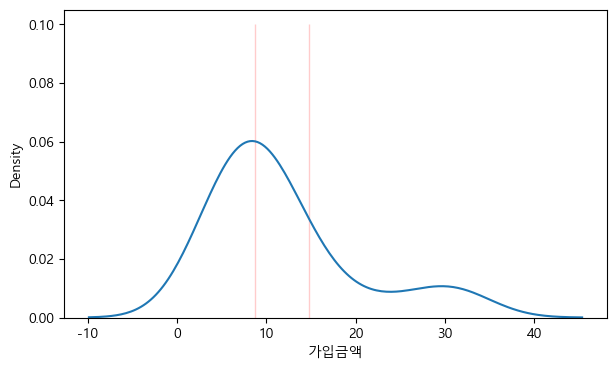

In [12]:
sb.kdeplot(data=df, x='가입금액')
sb.lineplot(x=[cmin,cmin], y=[0,0.1], color='red')
sb.lineplot(x=[cmax,cmax], y=[0,0.1],color='red')
plt.show()
plt.close()